In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import comb

Created random graph

In [2]:
def CreateGraph(n):
    random_array = np.triu(np.random.randint(0, 2, (n, n)), 1)
    random_array += random_array.T
    print(random_array)

In [3]:
n = 5

In [4]:
x = CreateGraph(n)

[[0 1 1 0 1]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [1 0 0 1 0]]


With using Depth first search (DFS) finding number of disconnected graphs.

In [9]:
import numpy as np

stack = []

def CreateGraph(n):
    random_array = np.triu(np.random.randint(0, 2, (n, n)), 1)
    random_array += random_array.T
    return random_array

def DFS(node, visited, graph):
    visited[node] = True
    old_node = node
    back = 0
    for i in range(len(graph)):
        if graph[node][i] == 1 and not visited[i]:
            stack.append(node)
            DFS(i, visited, graph)
    back += 1
    if back == 1:
        try:
            DFS(stack.pop(), visited, graph)
        except:
            return 0
            

def countComp(graph):
    n = len(graph)
    visited = [False] * n
    count = 0
    for i in range(n):
        if not visited[i]:
            DFS(i, visited, graph)
            count += 1
    return count

n = 5
graph = CreateGraph(n)
print(graph)
print("Number disconnected of components:", countComp(graph))


[[0 0 1 0 1]
 [0 0 0 1 0]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 0 1 1 0]]
Number disconnected of components: 1


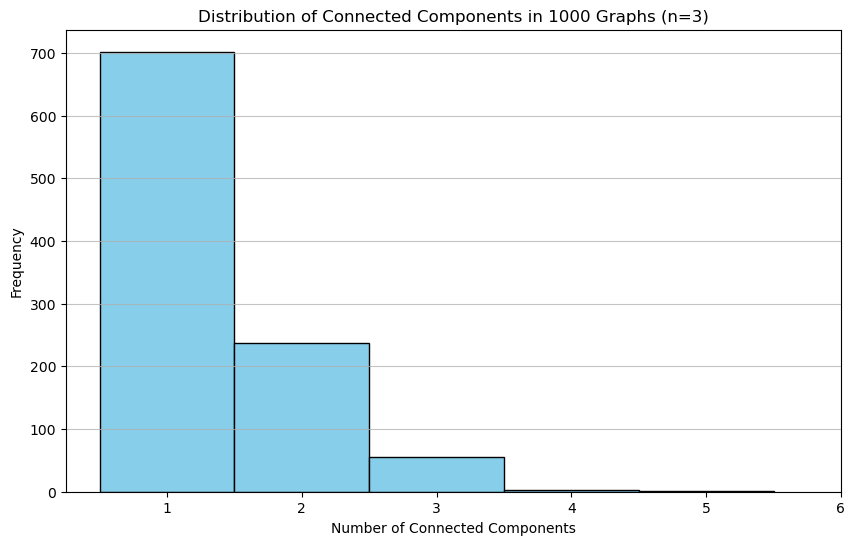

In [10]:
n = 5
results = []
for _ in range(1000):
    graph = CreateGraph(n)
    comp_count = countComp(graph)
    results.append(comp_count)

plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(1, n+2), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Connected Components in 1000 Graphs (n=3)')
plt.xlabel('Number of Connected Components')
plt.ylabel('Frequency')
plt.xticks(range(1, n+2))
plt.grid(axis='y', alpha=0.75)
plt.show()